In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, adfuller

In [217]:
df = pd.read_csv('dataset/corporacion-favorit/store44_mes.csv')

df

,date,family,quantity
0,2013-01-01,AUTOMOTIVE,539.000000
1,2013-01-01,BEAUTY,220.000000
2,2013-01-01,BEVERAGES,134704.000000
3,2013-01-01,BREAD/BAKERY,30754.766000
4,2013-01-01,CLEANING,79143.000000
...,...,...,...
1548,2017-08-01,POULTRY,17900.749000
1549,2017-08-01,PREPARED FOODS,4528.006000
1550,2017-08-01,PRODUCE,139693.164000
1551,2017-08-01,SCHOOL AND OFFICE SUPPLIES,6213.000000


### Estatísticas Descritivas

In [218]:
df['quantity'].describe()

#mean = média aritmética
#std = desvio padrão

count      1553.000000
mean      39979.107051
std       82147.656275
min           1.000000
25%         727.000000
50%        8811.000000
75%       29397.384030
max      443578.000000
Name: quantity, dtype: float64

In [219]:
print('maior venda:')
print(df.loc[df['quantity'].idxmax()])

print('')
print('menor venda:')
print(df.loc[df['quantity'].idxmin()])

maior venda:
date        2016-12-01
family       GROCERY I
quantity      443578.0
Name: 1277, dtype: object

menor venda:
date             2015-07-01
family      HOME APPLIANCES
quantity                1.0
Name: 754, dtype: object


## Serie

In [220]:
produto_mv = ['GROCERY I']
produtos_mv = ['BEVERAGES', 'PRODUCE', 'CLEANING']

### Transformando em Serie

In [221]:
def transf_serie(df, produto):

    df = df.set_index('date')
    df = df.sort_index(inplace=False)

    serie = df[df['family'] == produto]['quantity']

    return serie

In [222]:
series_df = {}

series_df['GROCERY I'] = transf_serie(df, produto_mv[0])

series_df

{'GROCERY I': date
 2013-01-01    241910.000
 2013-02-01    215495.000
 2013-03-01    244823.000
 2013-04-01    237864.000
 2013-05-01    242045.000
 2013-06-01    237982.000
 2013-07-01    234664.000
 2013-08-01    243398.000
 2013-09-01    249854.000
 2013-10-01    247008.000
 2013-11-01    315937.000
 2013-12-01    345746.000
 2014-01-01    258424.000
 2014-02-01    234679.000
 2014-03-01    286898.000
 2014-04-01    266740.000
 2014-05-01    273557.000
 2014-06-01    260157.000
 2014-07-01    271062.000
 2014-08-01    304385.000
 2014-09-01    295769.000
 2014-10-01    307372.000
 2014-11-01    296636.000
 2014-12-01    392794.000
 2015-01-01    275399.000
 2015-02-01    247334.000
 2015-03-01    291310.000
 2015-04-01    272043.000
 2015-05-01    294322.000
 2015-06-01    260040.000
 2015-07-01    265636.000
 2015-08-01    299401.000
 2015-09-01    294239.000
 2015-10-01    332201.000
 2015-11-01    310468.000
 2015-12-01    376872.038
 2016-01-01    302850.000
 2016-02-01    2738

In [223]:
for prod in produtos_mv:

    series_df[prod] = transf_serie(df, prod)

series_df

{'GROCERY I': date
 2013-01-01    241910.000
 2013-02-01    215495.000
 2013-03-01    244823.000
 2013-04-01    237864.000
 2013-05-01    242045.000
 2013-06-01    237982.000
 2013-07-01    234664.000
 2013-08-01    243398.000
 2013-09-01    249854.000
 2013-10-01    247008.000
 2013-11-01    315937.000
 2013-12-01    345746.000
 2014-01-01    258424.000
 2014-02-01    234679.000
 2014-03-01    286898.000
 2014-04-01    266740.000
 2014-05-01    273557.000
 2014-06-01    260157.000
 2014-07-01    271062.000
 2014-08-01    304385.000
 2014-09-01    295769.000
 2014-10-01    307372.000
 2014-11-01    296636.000
 2014-12-01    392794.000
 2015-01-01    275399.000
 2015-02-01    247334.000
 2015-03-01    291310.000
 2015-04-01    272043.000
 2015-05-01    294322.000
 2015-06-01    260040.000
 2015-07-01    265636.000
 2015-08-01    299401.000
 2015-09-01    294239.000
 2015-10-01    332201.000
 2015-11-01    310468.000
 2015-12-01    376872.038
 2016-01-01    302850.000
 2016-02-01    2738

## Analise Exploratoria das Series

### Componentes Básicas da Serie

In [224]:
def analise_serie(series_df, prod):

    print('')
    
    print(f'Estatisticas de {prod}')

    print(series_df[prod].describe())

    print('---'*30)

In [225]:
analise_serie(series_df, produto_mv[0])


Estatisticas de GROCERY I
count        56.000000
mean     292608.125679
std       50462.457488
min      143052.000000
25%      259636.000000
50%      292774.500000
75%      319366.000000
max      443578.000000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------


In [226]:
for prod in produtos_mv:
    
    analise_serie(series_df, prod)


Estatisticas de BEVERAGES
count        56.000000
mean     239604.625000
std       85535.292672
min      113249.000000
25%      142444.250000
50%      276057.500000
75%      307204.500000
max      364101.000000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------

Estatisticas de PRODUCE
count        54.000000
mean     197519.601452
std      154887.926740
min         435.000000
25%         952.000000
50%      297665.995250
75%      321079.261425
max      367752.226000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------

Estatisticas de CLEANING
count       56.000000
mean     76933.214286
std       8205.641874
min      35015.000000
25%      72898.500000
50%      77702.500000
75%      82069.500000
max      91209.000000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------


### Estacionaridade da Serie

In [227]:
def adf_serie(series_df, prod):

    print('')

    result = adfuller(series_df[prod])
    p_value = result[1]


    if p_value > 0.05:
        print(f"A série {prod} não é estacionária. Diferenciação necessária.")
    else:
        print(f"A série {prod} é estacionária. Nenhuma diferenciação necessária.")

    media_movel = series_df[prod].rolling(window=12).mean()
    desvio_padrao = series_df[prod].std()

    plt.figure(figsize=(20, 5))
    plt.plot(series_df[prod], color='deepskyblue')
    plt.plot(media_movel, color='orange', linestyle='--', label='media movel')

    plt.axhline(series_df[prod].mean() + desvio_padrao, color='green', linestyle='--', label='intervalo de concentração')
    plt.axhline(series_df[prod].mean() - desvio_padrao, color='green', linestyle='--')
    plt.axhline(series_df[prod].mean(), color='red', linestyle='--', label='media')
    
    plt.title('Estacionaridade de ' + prod)
    plt.xlabel('Tempo')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

    print('---'*60)
    print('')


A série GROCERY I não é estacionária. Diferenciação necessária.


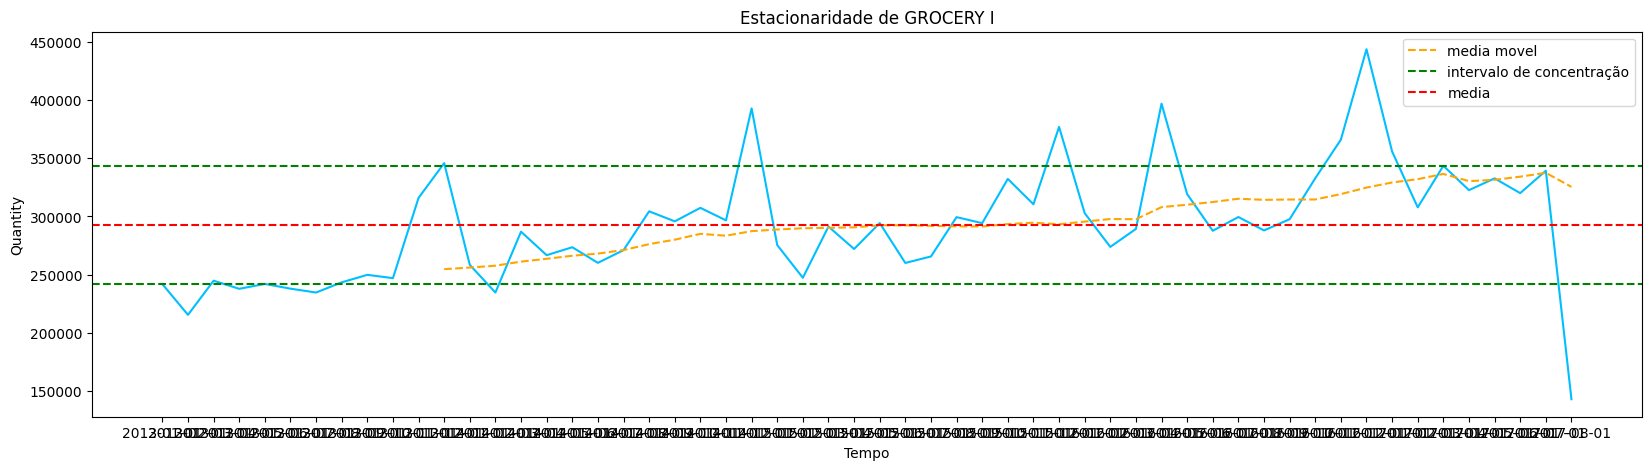

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [228]:
adf_serie(series_df, produto_mv[0])


A série BEVERAGES não é estacionária. Diferenciação necessária.


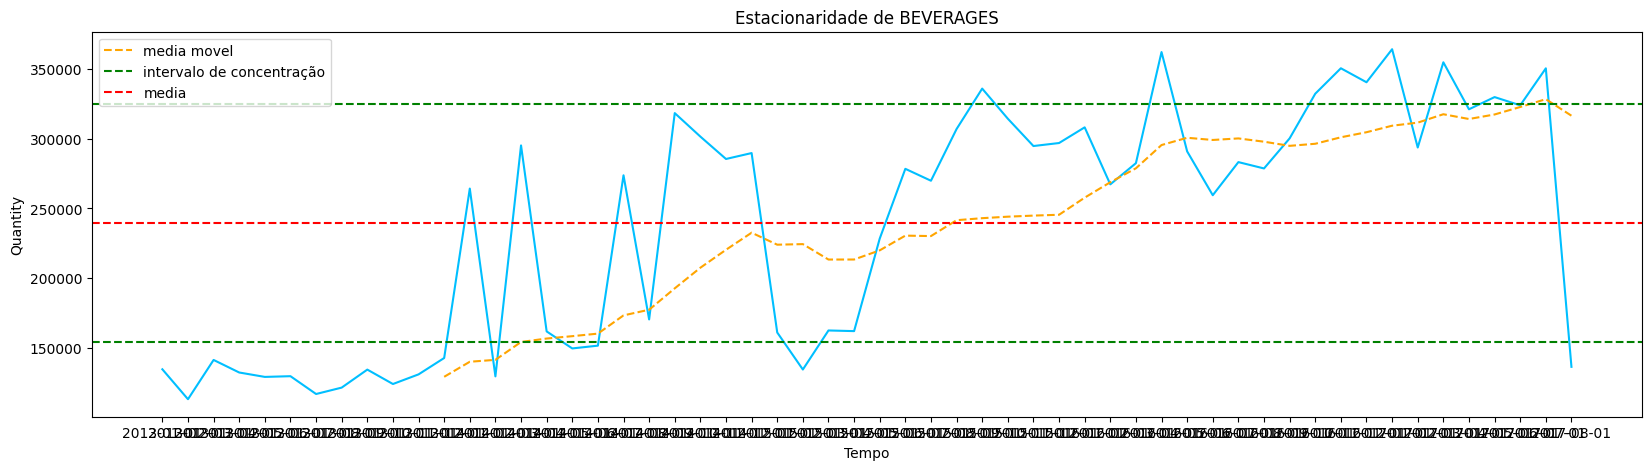

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


A série PRODUCE não é estacionária. Diferenciação necessária.


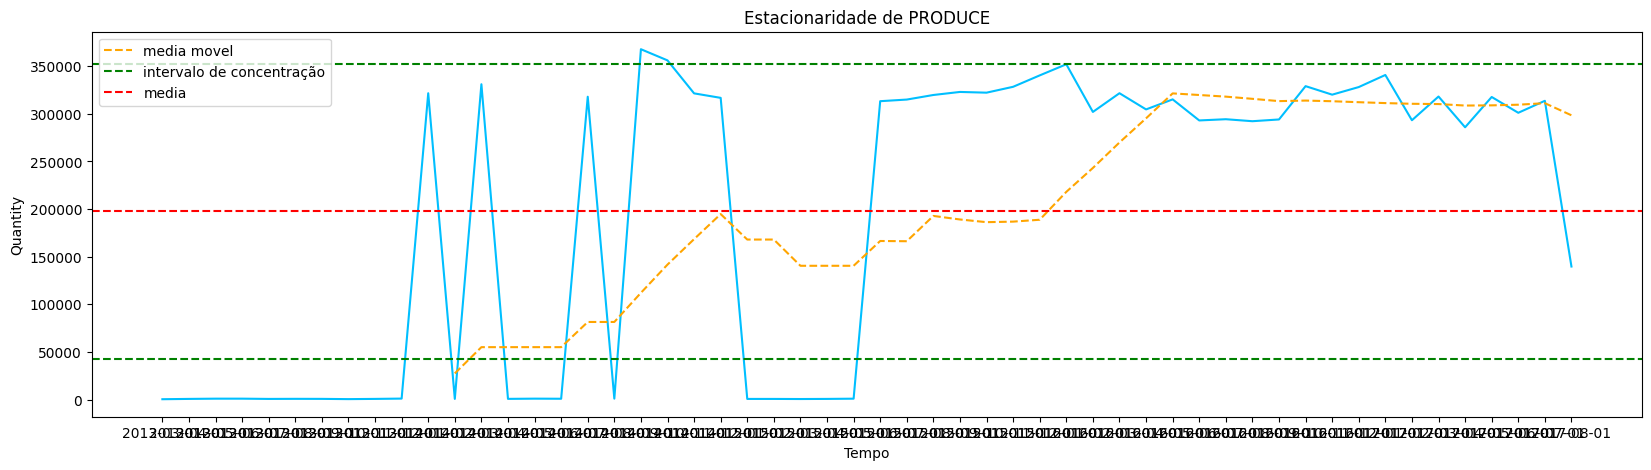

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


A série CLEANING é estacionária. Nenhuma diferenciação necessária.


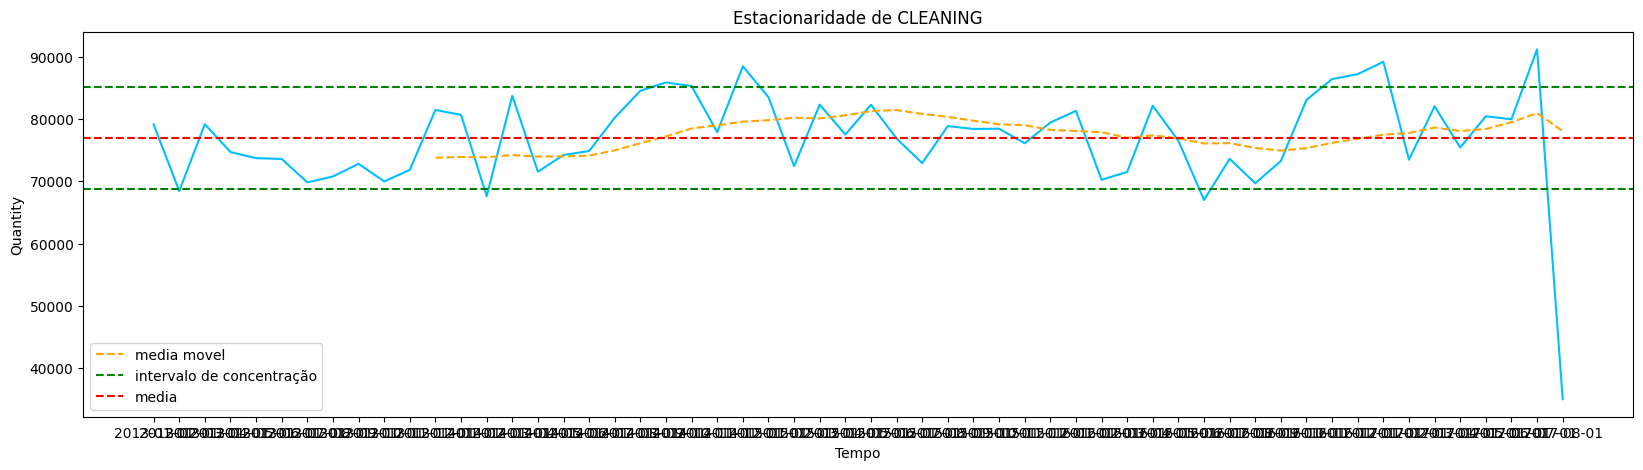

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [229]:
for prod in produtos_mv:
    adf_serie(series_df, prod)

### Decomposição Sazonal

In [230]:
def decomposition(series_df, prod, period=12):

    print('')
    print(f'Decomposição de {prod}')

    decomposition = seasonal_decompose(series_df[prod], model='additive', period=period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    resid = decomposition.resid

    fig, ax=plt.subplots(4, 1, figsize=(20, 11))

    ax[0].plot(series_df[prod], color='deepskyblue')
    ax[0].set_title('Serie')

    ax[1].plot(decomposition.trend, color='red')
    ax[1].set_title('Tendência')

    ax[2].plot(decomposition.seasonal, color='limegreen')
    ax[2].set_title('Sazonalidade')

    ax[3].plot(decomposition.resid, color='orange')
    ax[3].set_title('Resíduo')

    plt.tight_layout()
    plt.show()

    print('---'*50)

    return trend, seasonal, resid


Decomposição de GROCERY I


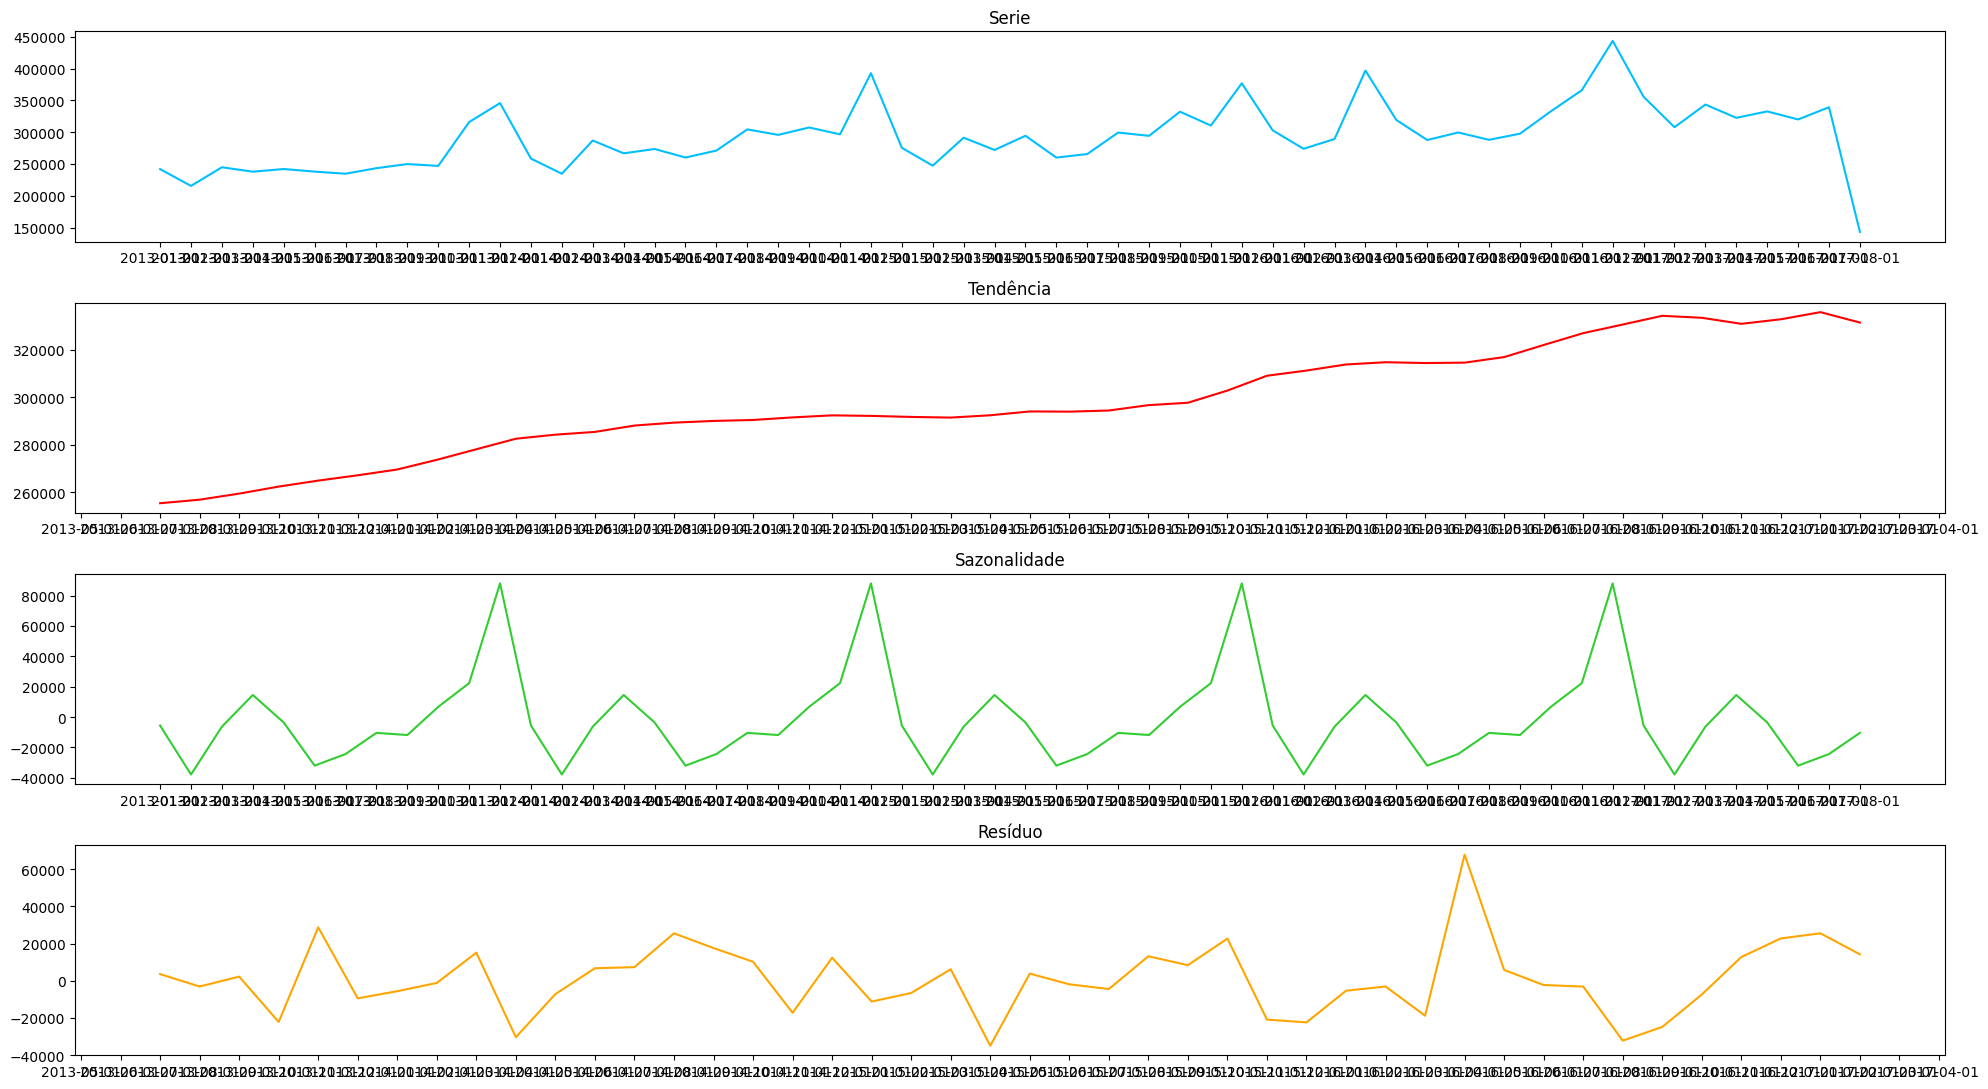

------------------------------------------------------------------------------------------------------------------------------------------------------


In [231]:
caracteristicas = {}

trend_mv, seasonal_mv, resid_mv = decomposition(series_df, produto_mv[0], 12)

caracteristicas[produto_mv[0]] = [trend_mv, seasonal_mv, resid_mv]



Decomposição de BEVERAGES


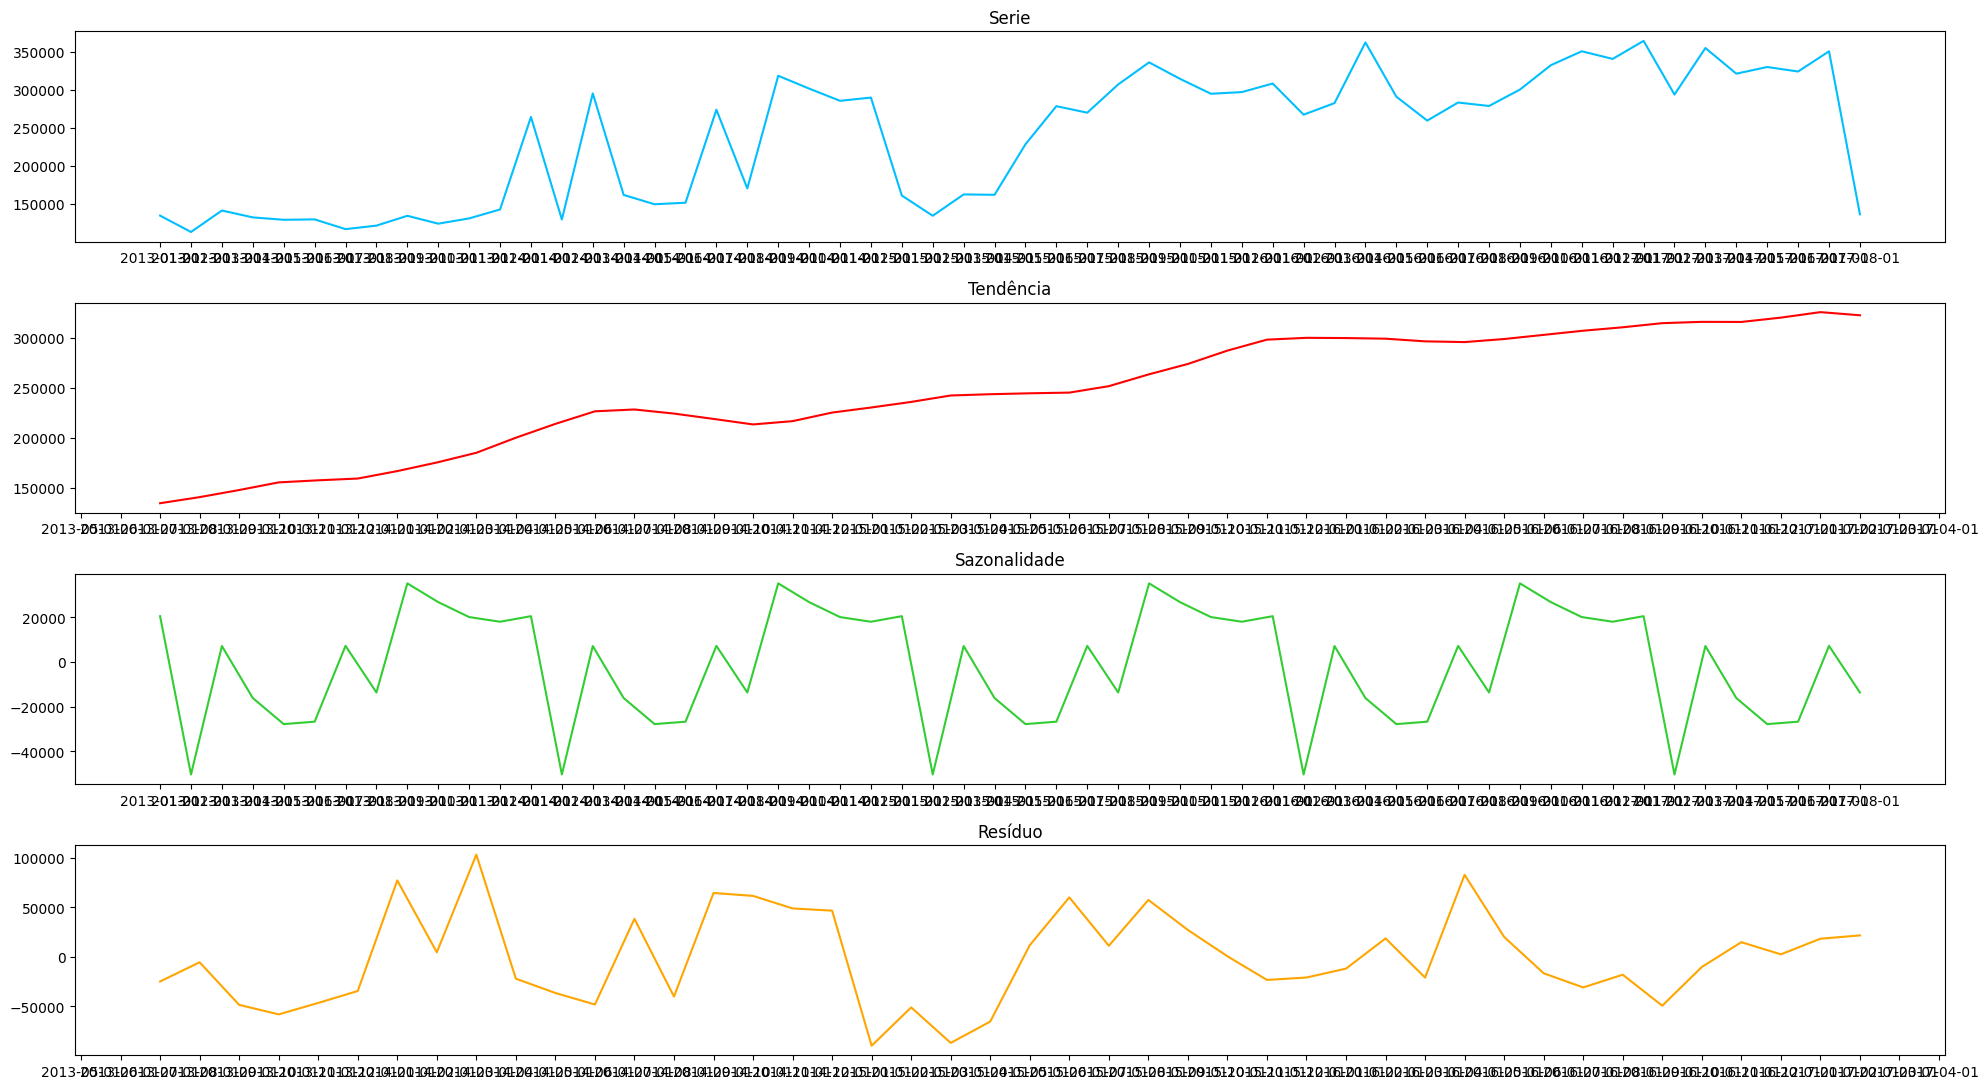

------------------------------------------------------------------------------------------------------------------------------------------------------

Decomposição de PRODUCE


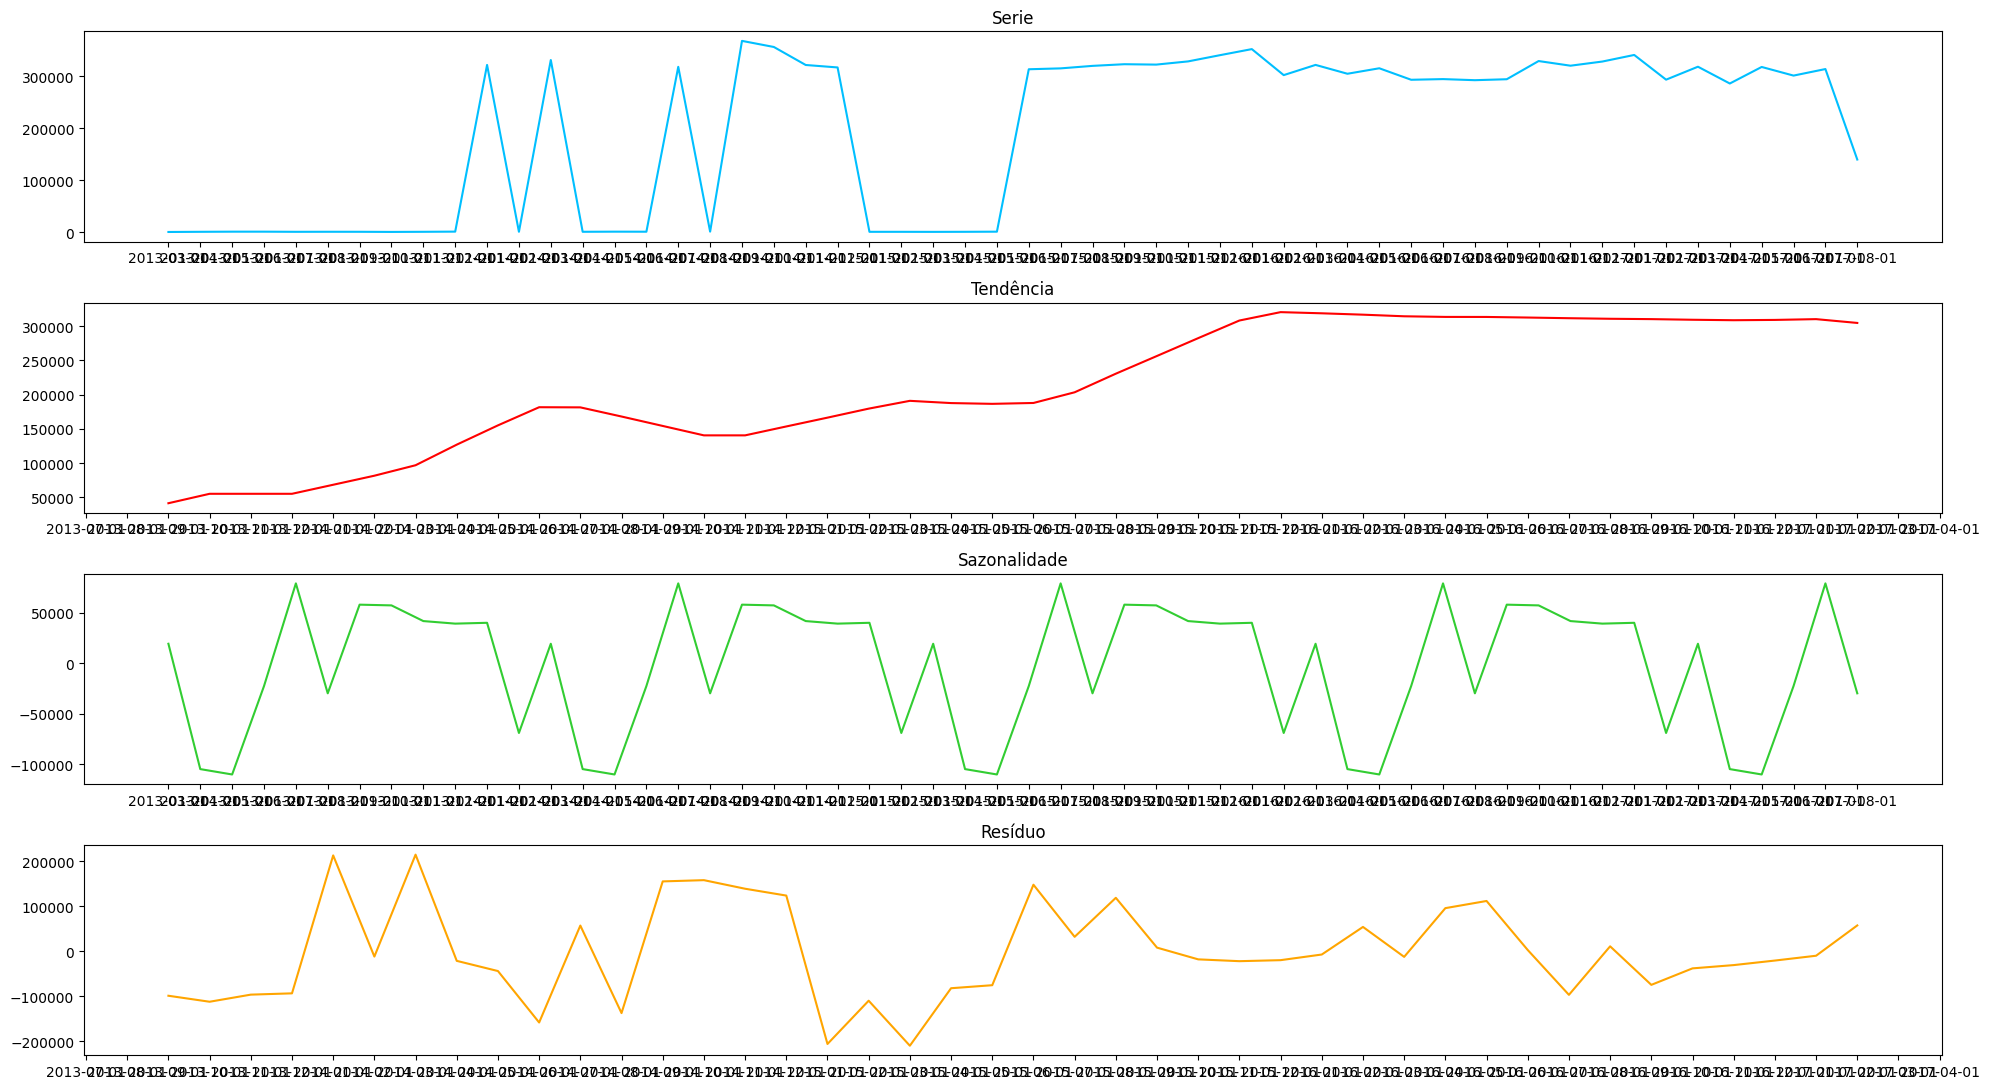

------------------------------------------------------------------------------------------------------------------------------------------------------

Decomposição de CLEANING


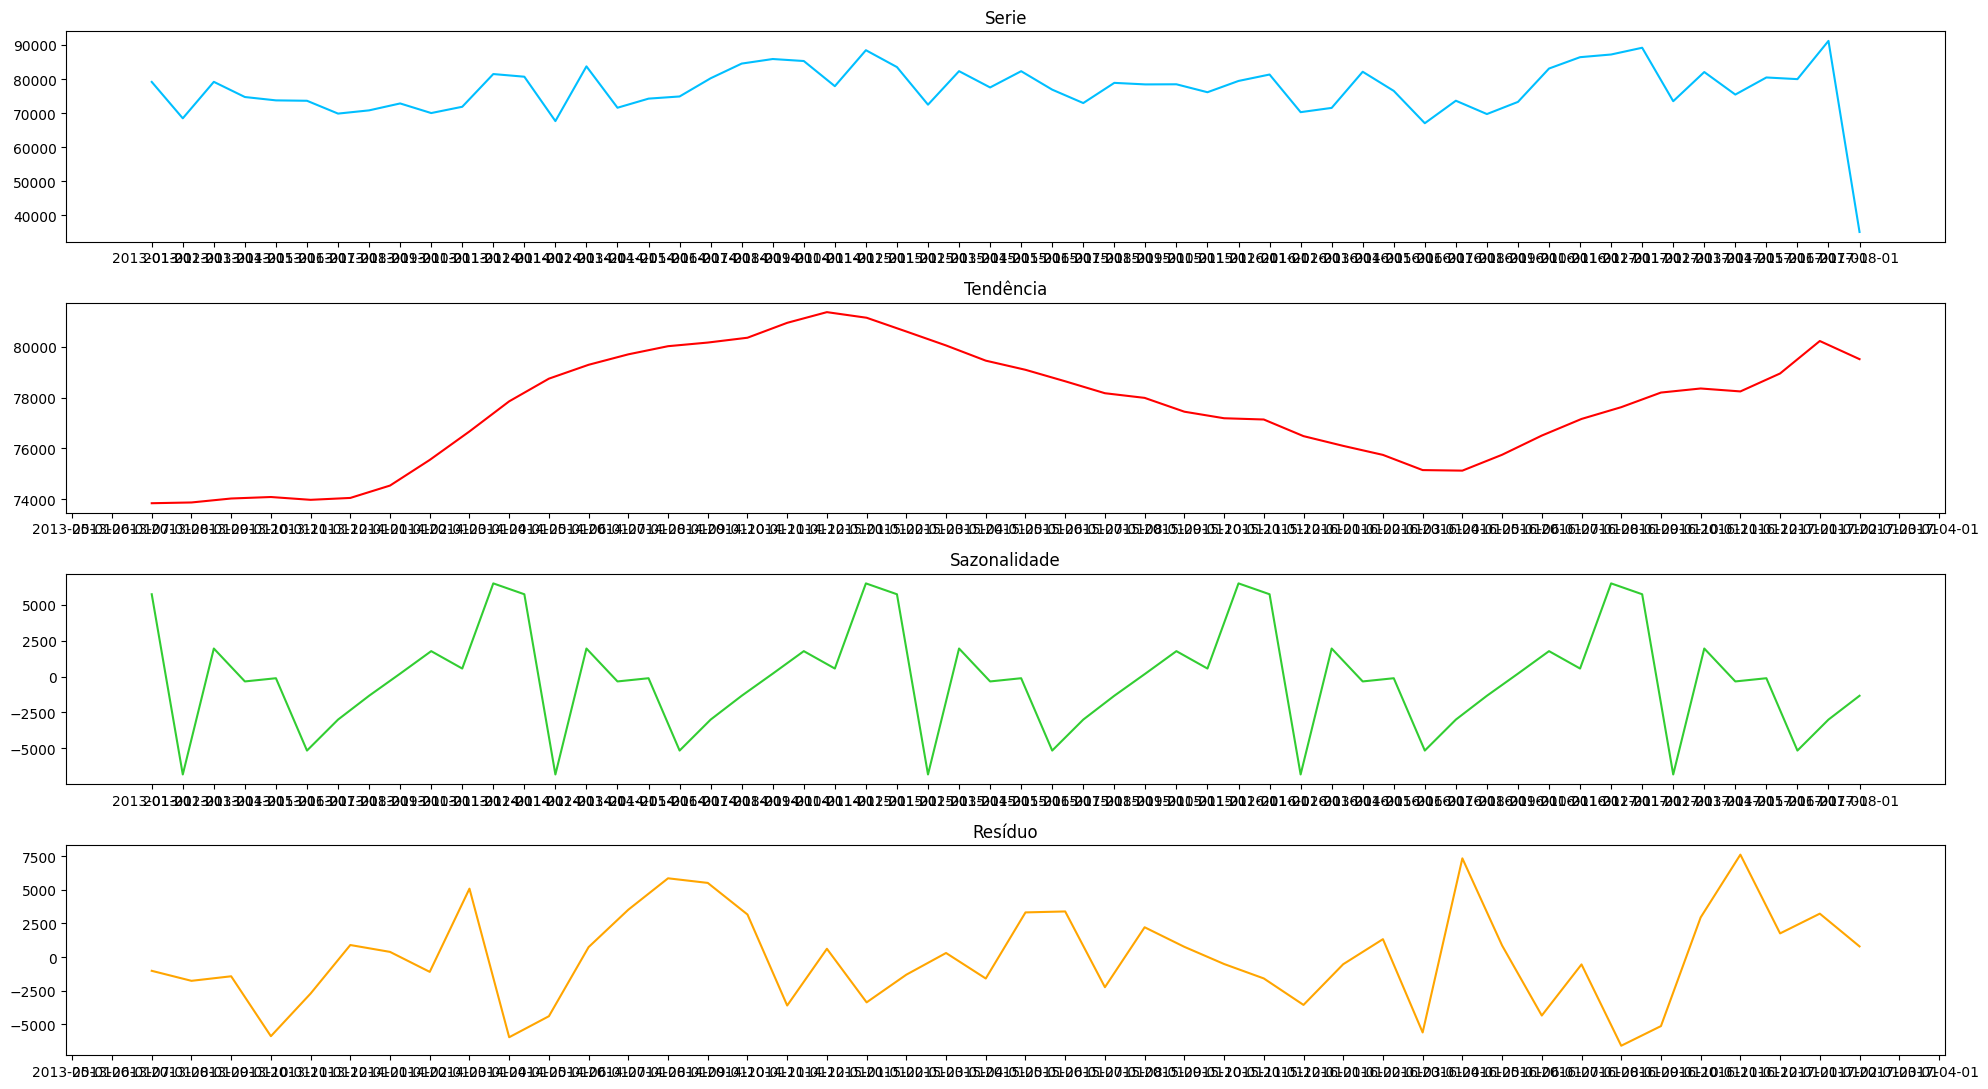

------------------------------------------------------------------------------------------------------------------------------------------------------


In [232]:
for prod in produtos_mv:
    
    trend, seasonal, resid = decomposition(series_df, prod, 12)

    caracteristicas[prod] = [trend, seasonal, resid]


### Autocorrelação dos resíduos das Series (ACF e PACF)

In [233]:
def acf_resid(series_df, prod):

    print('')
    print(f'Gráficos da Autocorrelação dos resíduos de {prod}')

    plt.figure(figsize=(10, 6))
    plot_acf(series_df[prod], lags=7, ax=plt.gca())
    plt.ylabel('Autocorrelação')
    plt.title(f'Autocorrelação (ACF) da Serie de {prod}')
    plt.show()

def pacf_resid(series_df, prod):

    plt.figure(figsize=(10, 6))
    plot_pacf(series_df[prod], lags=7, ax=plt.gca())
    plt.ylabel('Autocorrelação')
    plt.title(f'Autocorrelação Parcial (PACF) da Serie de {prod}')
    plt.show()

    print('')
    print('---'*40)



Gráficos da Autocorrelação dos resíduos de GROCERY I


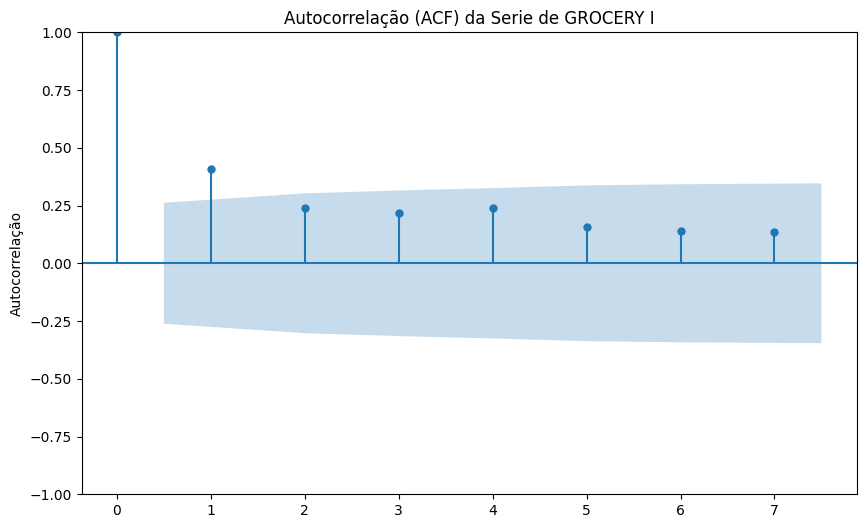

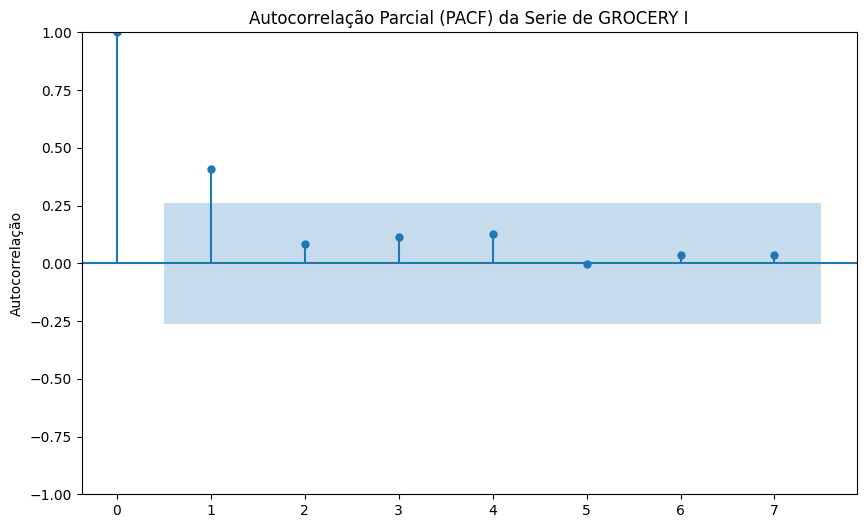


------------------------------------------------------------------------------------------------------------------------


In [234]:
acf_resid(series_df, produto_mv[0])

pacf_resid(series_df, produto_mv[0])


Gráficos da Autocorrelação dos resíduos de BEVERAGES


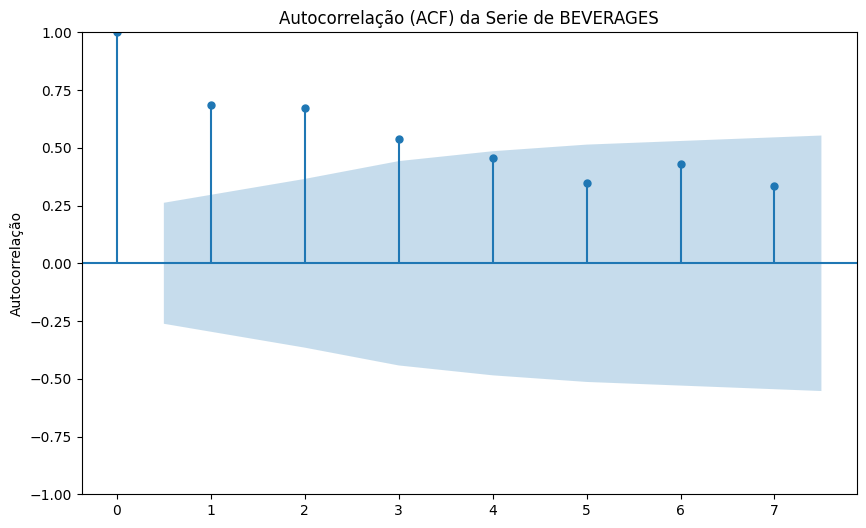

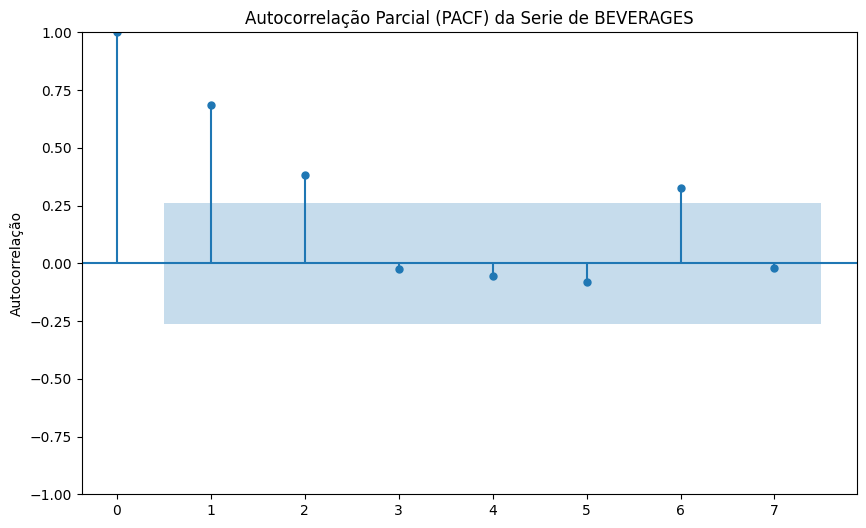


------------------------------------------------------------------------------------------------------------------------

Gráficos da Autocorrelação dos resíduos de PRODUCE


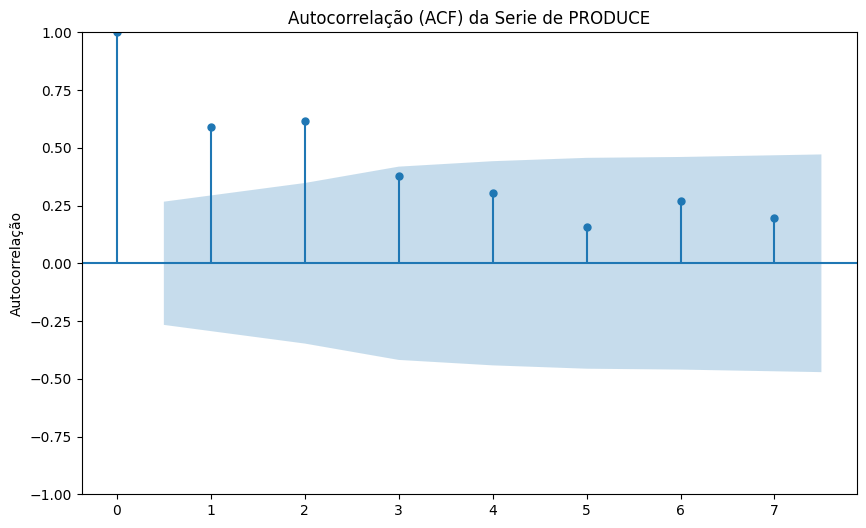

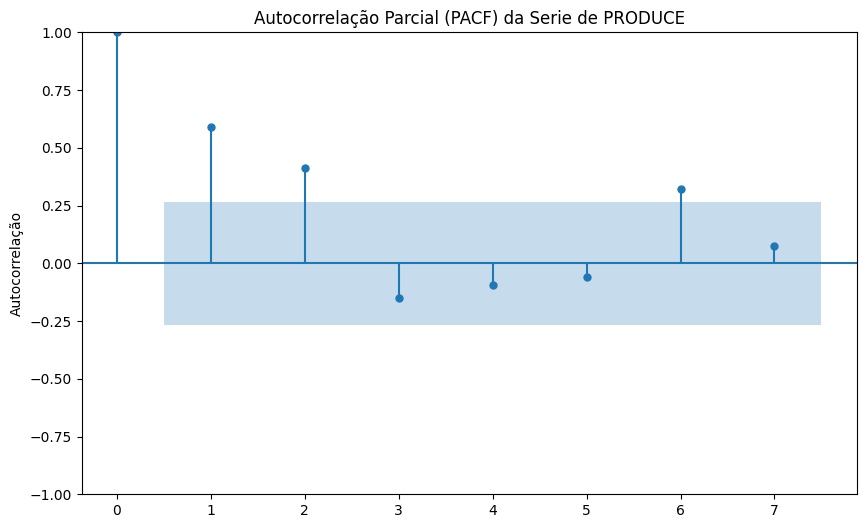


------------------------------------------------------------------------------------------------------------------------

Gráficos da Autocorrelação dos resíduos de CLEANING


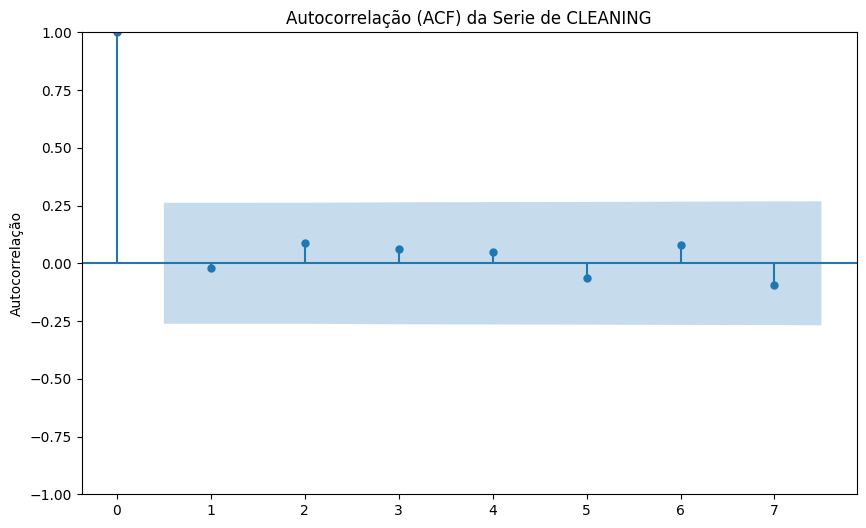

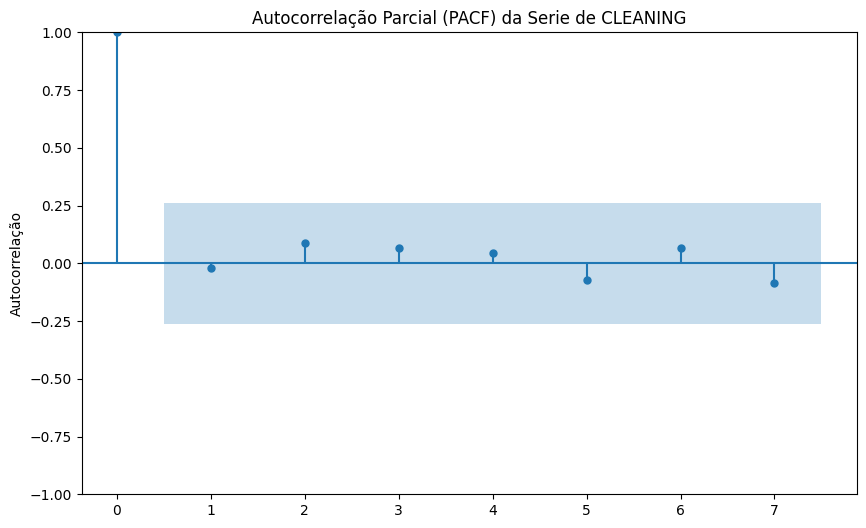


------------------------------------------------------------------------------------------------------------------------


In [235]:
for prod in produtos_mv:
    
    acf_resid(series_df, prod)

    pacf_resid(series_df, prod)

### Transformando Series em Dataframes

In [236]:
produtos_mv

['BEVERAGES', 'PRODUCE', 'CLEANING']

In [237]:
dataframes_series = {}

dataframes_series[produto_mv[0]] = pd.DataFrame(series_df[produto_mv[0]])

dataframes_series[produto_mv[0]]


,quantity
date,
2013-01-01,241910.000
2013-02-01,215495.000
2013-03-01,244823.000
2013-04-01,237864.000
2013-05-01,242045.000
2013-06-01,237982.000
2013-07-01,234664.000
2013-08-01,243398.000
2013-09-01,249854.000


In [238]:
for prod in produtos_mv:
    
    dataframes_series[prod] = pd.DataFrame(series_df[prod])

dataframes_series

{'GROCERY I':               quantity
 date                  
 2013-01-01  241910.000
 2013-02-01  215495.000
 2013-03-01  244823.000
 2013-04-01  237864.000
 2013-05-01  242045.000
 2013-06-01  237982.000
 2013-07-01  234664.000
 2013-08-01  243398.000
 2013-09-01  249854.000
 2013-10-01  247008.000
 2013-11-01  315937.000
 2013-12-01  345746.000
 2014-01-01  258424.000
 2014-02-01  234679.000
 2014-03-01  286898.000
 2014-04-01  266740.000
 2014-05-01  273557.000
 2014-06-01  260157.000
 2014-07-01  271062.000
 2014-08-01  304385.000
 2014-09-01  295769.000
 2014-10-01  307372.000
 2014-11-01  296636.000
 2014-12-01  392794.000
 2015-01-01  275399.000
 2015-02-01  247334.000
 2015-03-01  291310.000
 2015-04-01  272043.000
 2015-05-01  294322.000
 2015-06-01  260040.000
 2015-07-01  265636.000
 2015-08-01  299401.000
 2015-09-01  294239.000
 2015-10-01  332201.000
 2015-11-01  310468.000
 2015-12-01  376872.038
 2016-01-01  302850.000
 2016-02-01  273836.000
 2016-03-01  289269.000
 20

### Outliers

#### Identificação dos Outliers

In [239]:
def outliers(df_serie, produto):

    print('Outliers de ', produto)

    if 'quantity' not in df_serie[produto].columns:
        raise ValueError(f"A coluna 'quantity' não existe no DataFrame para o produto {produto}")


    df_serie[produto]['quantity'].plot.box()
    plt.title('Quantidade')
    plt.show()

    print('')

    z_scores = stats.zscore(df_serie[produto]['quantity'])
    outliers = df_serie[produto][np.abs(z_scores) > 3]

    print(f"Número de outliers: {outliers.shape[0]}")

    print(outliers)

    return outliers

Outliers de  GROCERY I


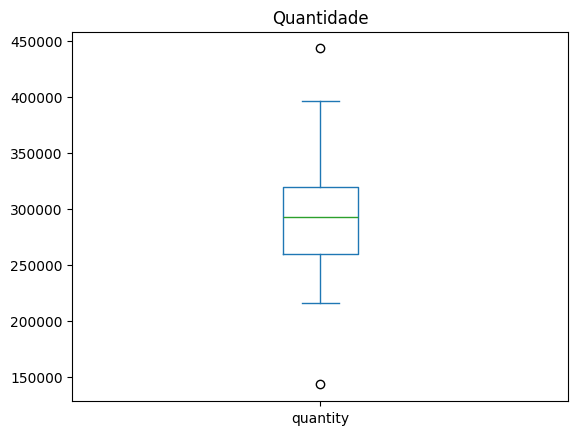


Número de outliers: 1
            quantity
date                
2016-12-01  443578.0


In [240]:
outliers_tds = {}

outliers_tds[produto_mv[0]] = outliers(dataframes_series, produto_mv[0])

Outliers de  BEVERAGES


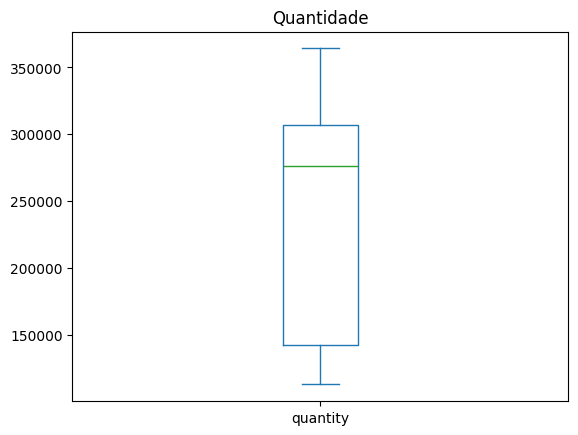


Número de outliers: 0
Empty DataFrame
Columns: [quantity]
Index: []
Outliers de  PRODUCE


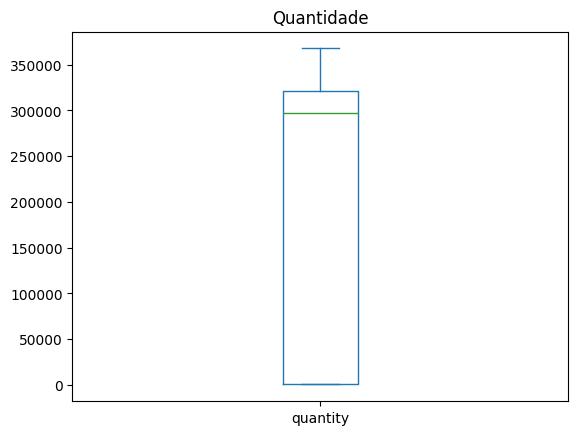


Número de outliers: 0
Empty DataFrame
Columns: [quantity]
Index: []
Outliers de  CLEANING


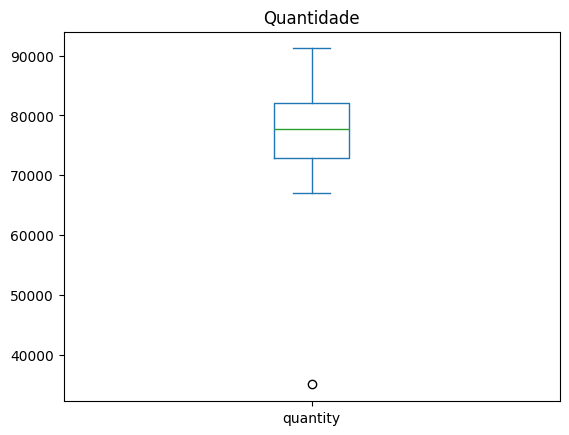


Número de outliers: 1
            quantity
date                
2017-08-01   35015.0


In [241]:
for prod in produtos_mv:
    outliers_tds[prod] = outliers(dataframes_series, prod)

#### Remoção dos Outliers

In [242]:
def remove_outliers(outliers, df):

    df_sem_outliers = df[~df.index.isin(outliers.index)]

    return df_sem_outliers

In [243]:
df_sem_outliers = {}

df_sem_outliers[produto_mv[0]] = remove_outliers(outliers_tds[produto_mv[0]], dataframes_series[produto_mv[0]])

df_sem_outliers[produto_mv[0]]

,quantity
date,
2013-01-01,241910.000
2013-02-01,215495.000
2013-03-01,244823.000
2013-04-01,237864.000
2013-05-01,242045.000
2013-06-01,237982.000
2013-07-01,234664.000
2013-08-01,243398.000
2013-09-01,249854.000


In [244]:
for prod in produtos_mv:
    df_sem_outliers[prod] = remove_outliers(outliers_tds[prod], dataframes_series[prod])

In [245]:
df_sem_outliers

{'GROCERY I':               quantity
 date                  
 2013-01-01  241910.000
 2013-02-01  215495.000
 2013-03-01  244823.000
 2013-04-01  237864.000
 2013-05-01  242045.000
 2013-06-01  237982.000
 2013-07-01  234664.000
 2013-08-01  243398.000
 2013-09-01  249854.000
 2013-10-01  247008.000
 2013-11-01  315937.000
 2013-12-01  345746.000
 2014-01-01  258424.000
 2014-02-01  234679.000
 2014-03-01  286898.000
 2014-04-01  266740.000
 2014-05-01  273557.000
 2014-06-01  260157.000
 2014-07-01  271062.000
 2014-08-01  304385.000
 2014-09-01  295769.000
 2014-10-01  307372.000
 2014-11-01  296636.000
 2014-12-01  392794.000
 2015-01-01  275399.000
 2015-02-01  247334.000
 2015-03-01  291310.000
 2015-04-01  272043.000
 2015-05-01  294322.000
 2015-06-01  260040.000
 2015-07-01  265636.000
 2015-08-01  299401.000
 2015-09-01  294239.000
 2015-10-01  332201.000
 2015-11-01  310468.000
 2015-12-01  376872.038
 2016-01-01  302850.000
 2016-02-01  273836.000
 2016-03-01  289269.000
 20